<a href="https://colab.research.google.com/github/IgnacioRiveraGonzalez/Incidencias_Tibco/blob/main/LPTIB502_GLE_TEDT_BW_DIIC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import tensorflow as tf
import keras
from keras import optimizers, Sequential
from keras.optimizers import adam_v2
#from tensorflow.keras.optimizers import Adam
from keras.models import Model
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from numpy import arange, sin, pi, random
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.integrate as integrate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.neighbors._kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr

np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/LPTIB502_GLE_TEDT_BW_DIIC_01_enero_2022_incidencias_marcadas.csv')
df

,Unnamed: 0,Unnamed: 0.1,timestamp,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,processId,host,metricSetId,instance,processType,uuaa,isStarted,startTime,applicationId,reinicio,incidencia
0,0,390,2021-12-30 23:04:32,637009920,133807416,503202504,78,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
1,1,923,2021-12-30 23:14:32,637009920,101013944,535995976,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
2,2,1456,2021-12-30 23:24:32,637009920,100928136,536081784,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
3,3,1989,2021-12-30 23:34:32,637009920,100846344,536163576,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
4,4,2522,2021-12-30 23:44:32,637009920,109223696,527786224,82,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,4545,43780,2022-01-31 13:14:54,642777088,196694448,446082640,69,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:16,GLE_TEDT_BW_DIIC,0,0
4546,4546,44292,2022-01-31 13:24:54,642777088,167348616,475428472,73,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:16,GLE_TEDT_BW_DIIC,0,0
4547,4547,44804,2022-01-31 13:34:53,642777088,167266096,475510992,73,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:14,GLE_TEDT_BW_DIIC,0,0
4548,4548,45316,2022-01-31 13:44:53,643301376,176996336,466305040,72,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:14,GLE_TEDT_BW_DIIC,0,0


In [ ]:
#df = pd.read_csv('/content/instance1_lptib503.csv')


'''for i in range(1,5):
  globals()['df'+str(i)] = pd.read_csv(f'/content/LPTIB503_CIB_EYFW_BW_CLE_ModuloBBDD_Eventos_0{i}.csv')
  globals()['df'+str(i)] = globals()['df'+str(i)].drop('Unnamed: 0', axis=1)
  globals()['df'+str(i)] =  globals()['df'+str(i)].set_axis(['timestamp', 'jvm_total_memory', 'jvm_free_memory',
       'jvm_usage_memory', 'jvm_usage_percent', 'number_of_threads',
       'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa',
       'isStarted', 'startTime', 'applicationId'], axis=1, inplace=False)'''


"for i in range(1,5):\n  globals()['df'+str(i)] = pd.read_csv(f'/content/LPTIB503_CIB_EYFW_BW_CLE_ModuloBBDD_Eventos_0{i}.csv')\n  globals()['df'+str(i)] = globals()['df'+str(i)].drop('Unnamed: 0', axis=1)\n  globals()['df'+str(i)] =  globals()['df'+str(i)].set_axis(['timestamp', 'jvm_total_memory', 'jvm_free_memory',\n       'jvm_usage_memory', 'jvm_usage_percent', 'number_of_threads',\n       'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa',\n       'isStarted', 'startTime', 'applicationId'], axis=1, inplace=False)"

In [ ]:
df2 = df.copy()
df2

,Unnamed: 0,Unnamed: 0.1,timestamp,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,processId,host,metricSetId,instance,processType,uuaa,isStarted,startTime,applicationId,reinicio,incidencia
0,0,390,2021-12-30 23:04:32,637009920,133807416,503202504,78,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
1,1,923,2021-12-30 23:14:32,637009920,101013944,535995976,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
2,2,1456,2021-12-30 23:24:32,637009920,100928136,536081784,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
3,3,1989,2021-12-30 23:34:32,637009920,100846344,536163576,84,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
4,4,2522,2021-12-30 23:44:32,637009920,109223696,527786224,82,0,72858.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2021-12-23 10:03:00,GLE_TEDT_BW_DIIC,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,4545,43780,2022-01-31 13:14:54,642777088,196694448,446082640,69,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:16,GLE_TEDT_BW_DIIC,0,0
4546,4546,44292,2022-01-31 13:24:54,642777088,167348616,475428472,73,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:16,GLE_TEDT_BW_DIIC,0,0
4547,4547,44804,2022-01-31 13:34:53,642777088,167266096,475510992,73,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:14,GLE_TEDT_BW_DIIC,0,0
4548,4548,45316,2022-01-31 13:44:53,643301376,176996336,466305040,72,0,438826.0,lptib502,status-metric,LPTIB502_GLE_TEDT_BW_DIIC_01,bwengine,TEDT,ACTIVE,2022-01-28 11:14:14,GLE_TEDT_BW_DIIC,0,0


In [ ]:
df2 = df2.drop(['Unnamed: 0', 'Unnamed: 0.1', 'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa', 'isStarted', 'startTime', 'applicationId', 'reinicio', 'incidencia'], axis=1)
df2 = df2.set_index('timestamp')
df2 = df2.dropna()
df2

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2021-12-30 23:04:32,637009920,133807416,503202504,78,0
2021-12-30 23:14:32,637009920,101013944,535995976,84,0
2021-12-30 23:24:32,637009920,100928136,536081784,84,0
2021-12-30 23:34:32,637009920,100846344,536163576,84,0
2021-12-30 23:44:32,637009920,109223696,527786224,82,0
...,...,...,...,...,...
2022-01-31 13:14:54,642777088,196694448,446082640,69,0
2022-01-31 13:24:54,642777088,167348616,475428472,73,0
2022-01-31 13:34:53,642777088,167266096,475510992,73,0


In [ ]:
df2['jvm_total_memory'].unique()

array([637009920, 638058496, 637534208, 633864192, 635961344, 636485632,
       820510720, 805830656, 789577728, 781713408, 769130496, 757596160,
       742391808, 752353280, 731381760, 720896000, 714080256, 705691648,
       703070208, 697827328, 691011584, 684195840, 672137216, 665321472,
       660602880, 656408576, 651165696, 649068544, 642777088, 646447104,
       647495680, 648019968, 646971392, 645922816, 648544256, 649592832,
       650117120, 658505728, 659030016, 650641408, 651689984, 644874240,
       643825664, 644349952, 678952960, 717750272, 718274560, 711983104,
       704118784, 689438720, 682622976, 677380096, 667942912, 664797184,
       659554304, 653787136, 721420288, 716701696, 703594496, 701497344,
       693633024, 687865856, 675282944, 668991488, 664272896, 655360000,
       652738560, 673185792, 661127168, 656932864, 653262848, 645398528,
       652214272, 643301376, 642252800, 618659840, 626524160, 555220992,
       603979776, 543686656, 588251136, 534773760, 

In [ ]:
df3 = pd.read_csv('/content/LPTIB502_GLE_TEDT_BW_DIIC_01_febrero_marzo_2022_incidencias_marcadas.csv')
df4 = df3.copy()

df4 = df4.drop(['Unnamed: 0', 'Unnamed: 0.1', 'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa', 'isStarted', 'startTime', 'applicationId', 'reinicio', 'incidencia'], axis=1)
df4 = df4.set_index('timestamp')
df4 = df4.dropna()
df4

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2022-02-13 23:01:41,662175744,58432856,603742888,91,0.0
2022-02-13 23:11:41,662175744,23598952,638576792,96,0.0
2022-02-13 23:21:42,662175744,72478488,589697256,89,0.0
2022-02-13 23:31:42,662175744,72392304,589783440,89,0.0
2022-02-13 23:41:42,662175744,37690408,624485336,94,0.0
...,...,...,...,...,...
2022-03-17 13:26:43,695205888,36010488,659195400,94,0.0
2022-03-17 13:36:43,687865856,70530232,617335624,89,0.0
2022-03-17 13:46:43,687865856,70443072,617422784,89,0.0


In [ ]:
#X = df2.copy()
#Y = df2.copy()

#X_train, X_test, y_train, y_test =  train_test_split(X,Y,test_size=0.35, shuffle=False) 

'''X_train = X_train.drop(X_train[X_train['incidencia']==1].index) 
X_train = X_train.drop('incidencia', axis=1)
X_test = X_test.drop('incidencia', axis=1)'''

X_train = df2.copy()
X_test = df4.copy()

y_train = df['incidencia']
y_test = df3['incidencia']

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

X_train_scaled = pd.DataFrame(X_train_s)

X_train_scaled.columns = X_train.columns
X_train_scaled = X_train_scaled.set_index(X_train.index)


X_test_s = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_s)
X_test_scaled.columns = X_test.columns
X_test_scaled = X_test_scaled.set_index(X_test.index)
X_test_scaled

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2022-02-13 23:01:41,0.488604,0.128246,0.613599,0.857143,0.0
2022-02-13 23:11:41,0.488604,0.037978,0.686439,0.959184,0.0
2022-02-13 23:21:42,0.488604,0.164643,0.584229,0.816327,0.0
2022-02-13 23:31:42,0.488604,0.164420,0.584409,0.816327,0.0
2022-02-13 23:41:42,0.488604,0.074494,0.656973,0.918367,0.0
...,...,...,...,...,...
2022-03-17 13:26:43,0.578348,0.070141,0.729554,0.918367,0.0
2022-03-17 13:36:43,0.558405,0.159595,0.642023,0.816327,0.0
2022-03-17 13:46:43,0.558405,0.159369,0.642205,0.816327,0.0


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12
n_features = 5
#batch_size = 32

generator = TimeseriesGenerator(X_train_scaled.values,X_train_scaled.values,length=n_input,batch_size=1)

In [ ]:
# build network
lstm_autoencoder = Sequential()
# Encoder
lstm_autoencoder.add(LSTM(100, activation='relu', input_shape=(n_input,n_features), return_sequences=True))
lstm_autoencoder.add(LSTM(25, activation='relu', return_sequences=False))
lstm_autoencoder.add(RepeatVector(n_input))
# Decoder
lstm_autoencoder.add(LSTM(25, activation='relu', return_sequences=True))
lstm_autoencoder.add(LSTM(100, activation='relu', return_sequences=True))
lstm_autoencoder.add(TimeDistributed(Dense(n_features)))
lstm_autoencoder.compile(loss='mse', optimizer='adam')
lstm_autoencoder.summary()
#adam = optimizers.Adam(lr)
#adam = adam_v2(lr)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           42400     
                                                                 
 lstm_1 (LSTM)               (None, 25)                12600     
                                                                 
 repeat_vector (RepeatVector  (None, 12, 25)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 12, 25)            5100      
                                                                 
 lstm_3 (LSTM)               (None, 12, 100)           50400     
                                                                 
 time_distributed (TimeDistr  (None, 12, 5)            505       
 ibuted)                                                

In [ ]:
lstm_autoencoder.fit_generator(generator,epochs=6)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


4538/4538 [==============================] - 98s 20ms/step - loss: 0.0172
Epoch 2/6
4538/4538 [==============================] - 92s 20ms/step - loss: 0.0105
Epoch 3/6
4538/4538 [==============================] - 90s 20ms/step - loss: 0.0098
Epoch 4/6
4538/4538 [==============================] - 89s 20ms/step - loss: 0.0094
Epoch 5/6
4538/4538 [==============================] - 88s 19ms/step - loss: 0.0092
Epoch 6/6
4538/4538 [==============================] - 88s 19ms/step - loss: 0.0091


In [ ]:
generator2 = TimeseriesGenerator(X_test_scaled.values,X_test_scaled.values,length=n_input,batch_size=1)

In [ ]:
predicted = lstm_autoencoder.predict(generator2)

In [ ]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [ ]:
f_pred = flatten(predicted)
fp = pd.DataFrame(f_pred)
fp

,0,1,2,3,4
0,0.463638,0.274870,0.473343,0.665982,0.003927
1,0.462413,0.272814,0.474336,0.668176,0.003864
2,0.453872,0.189618,0.534228,0.759517,0.002051
3,0.475243,0.297806,0.463073,0.642005,0.004615
4,0.468487,0.294976,0.460341,0.644304,0.004412
...,...,...,...,...,...
4535,0.515820,0.149511,0.614314,0.828298,-0.004611
4536,0.511852,0.145686,0.615196,0.833043,-0.004528
4537,0.498134,0.181253,0.572826,0.780070,-0.000641
4538,0.493577,0.172533,0.577390,0.790742,-0.000819


In [ ]:
predicted_train = lstm_autoencoder.predict(generator)
t_pred = flatten(predicted_train)
fp2 = pd.DataFrame(t_pred)
fp2

,0,1,2,3,4
0,0.415407,0.311973,0.407844,0.608992,0.002694
1,0.416283,0.314199,0.406616,0.606671,0.002744
2,0.417702,0.327810,0.396022,0.590854,0.002902
3,0.416358,0.330551,0.392772,0.587120,0.002886
4,0.415781,0.332747,0.390483,0.584218,0.002896
...,...,...,...,...,...
4533,0.449067,0.483052,0.299576,0.414755,0.007067
4534,0.444414,0.496689,0.287037,0.397999,0.007318
4535,0.451019,0.432608,0.338011,0.473632,0.005847
4536,0.447286,0.423195,0.341587,0.482288,0.005768


In [ ]:
mse = np.mean(np.power(X_test_scaled.values[12:] - flatten(predicted), 2), axis=1)
mse_train = np.mean(np.power(X_train_scaled.values[12:] - flatten(predicted_train), 2), axis=1)

In [ ]:
X_test_scaled222 = X_test_scaled.iloc[12:]
X_train_scaled222 = X_train_scaled.iloc[12:]

X_train_scaled222['RMSE_train'] = mse_train**(1/2)
X_test_scaled222['RMSE_test'] = mse**(1/2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **LPTIB502_GLE_TEDT_BW_DIIC_01**
---



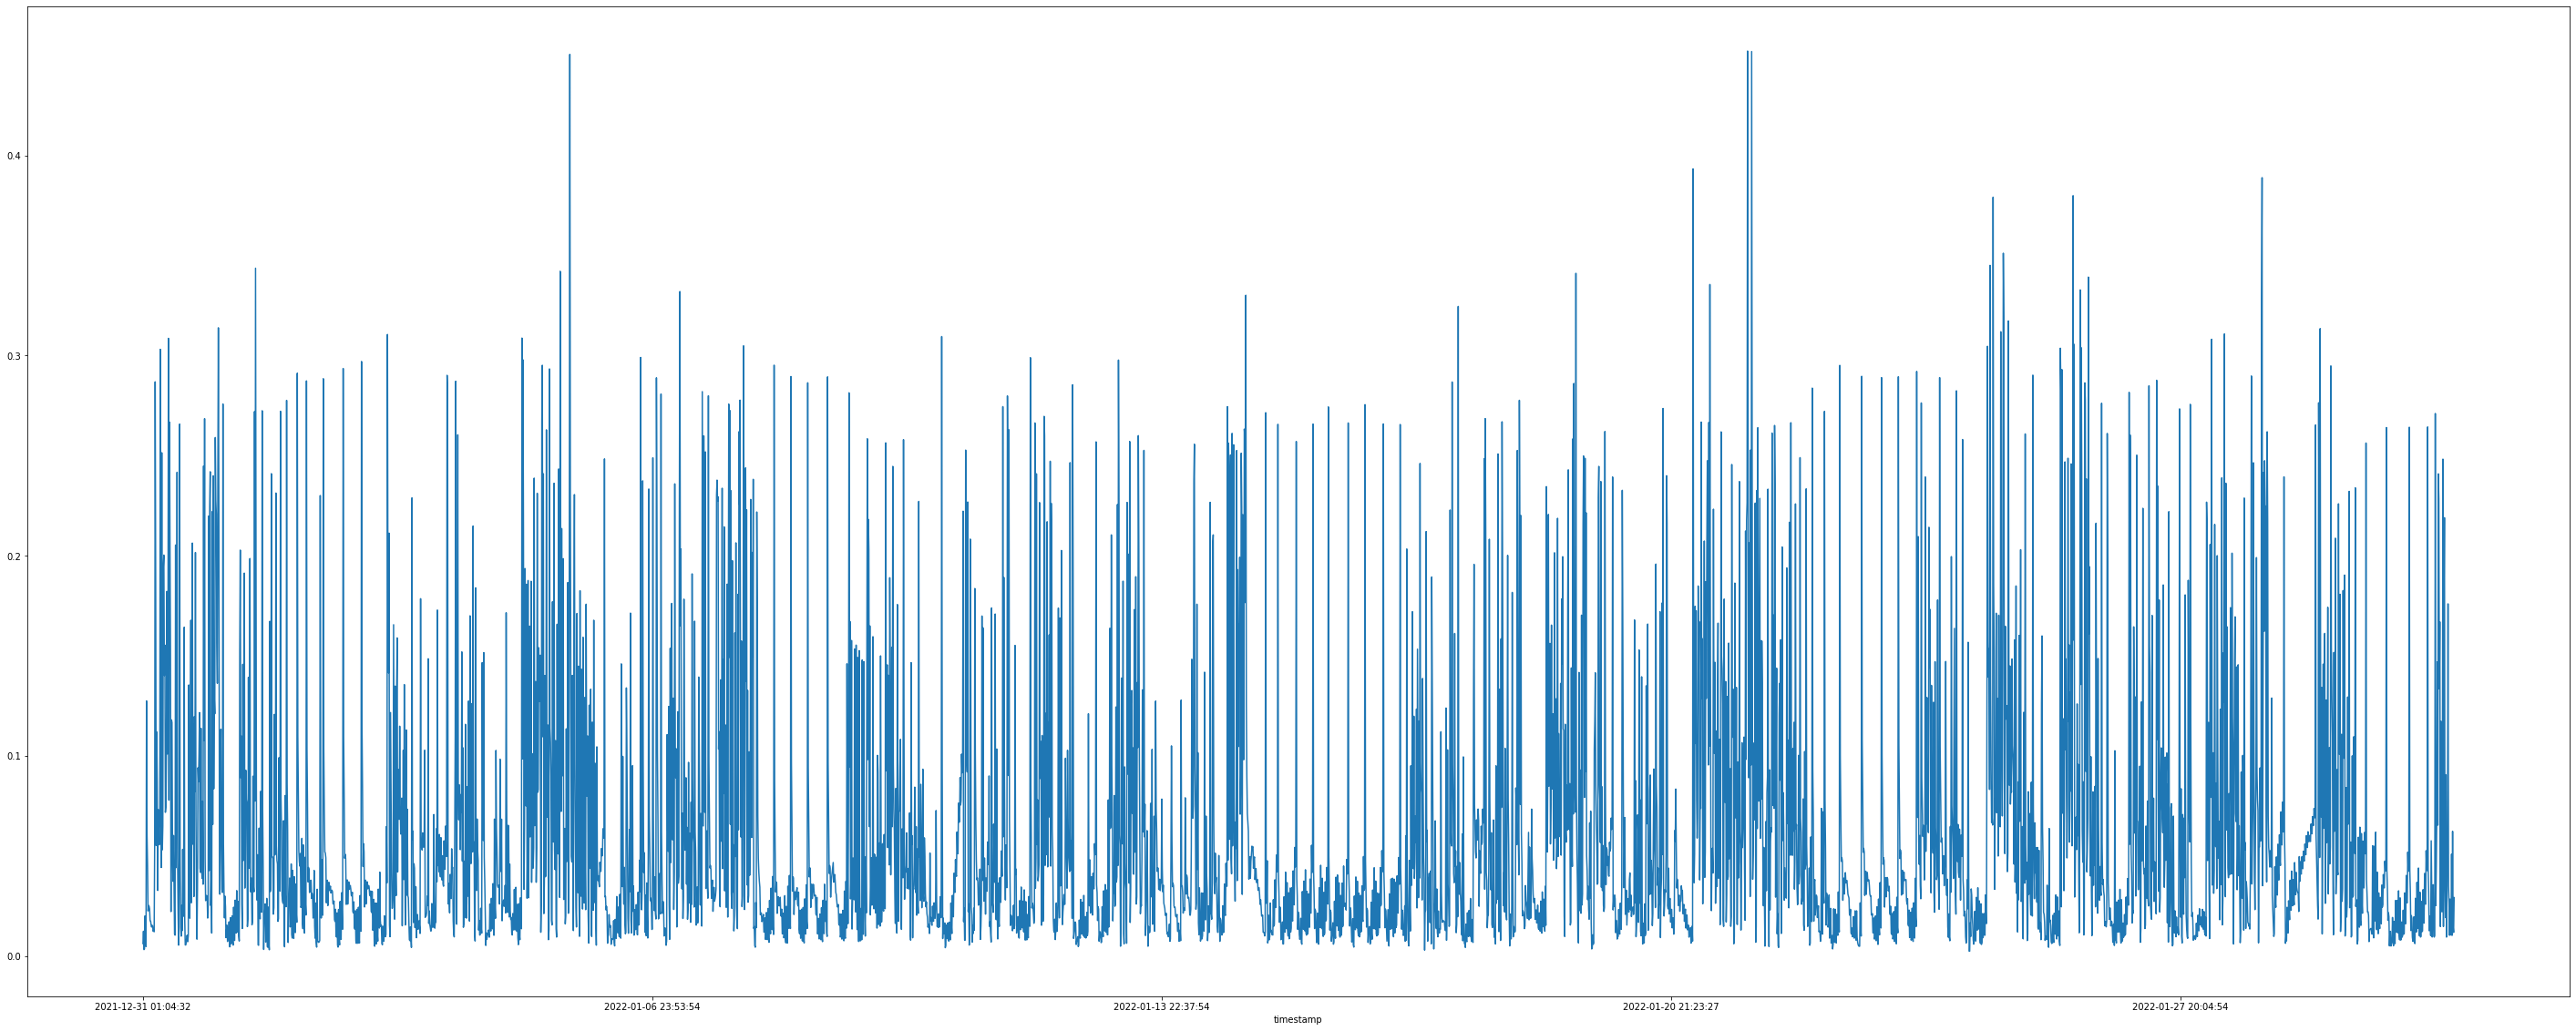

In [ ]:
X_train_scaled222['RMSE_train'].plot(figsize=(50,20))

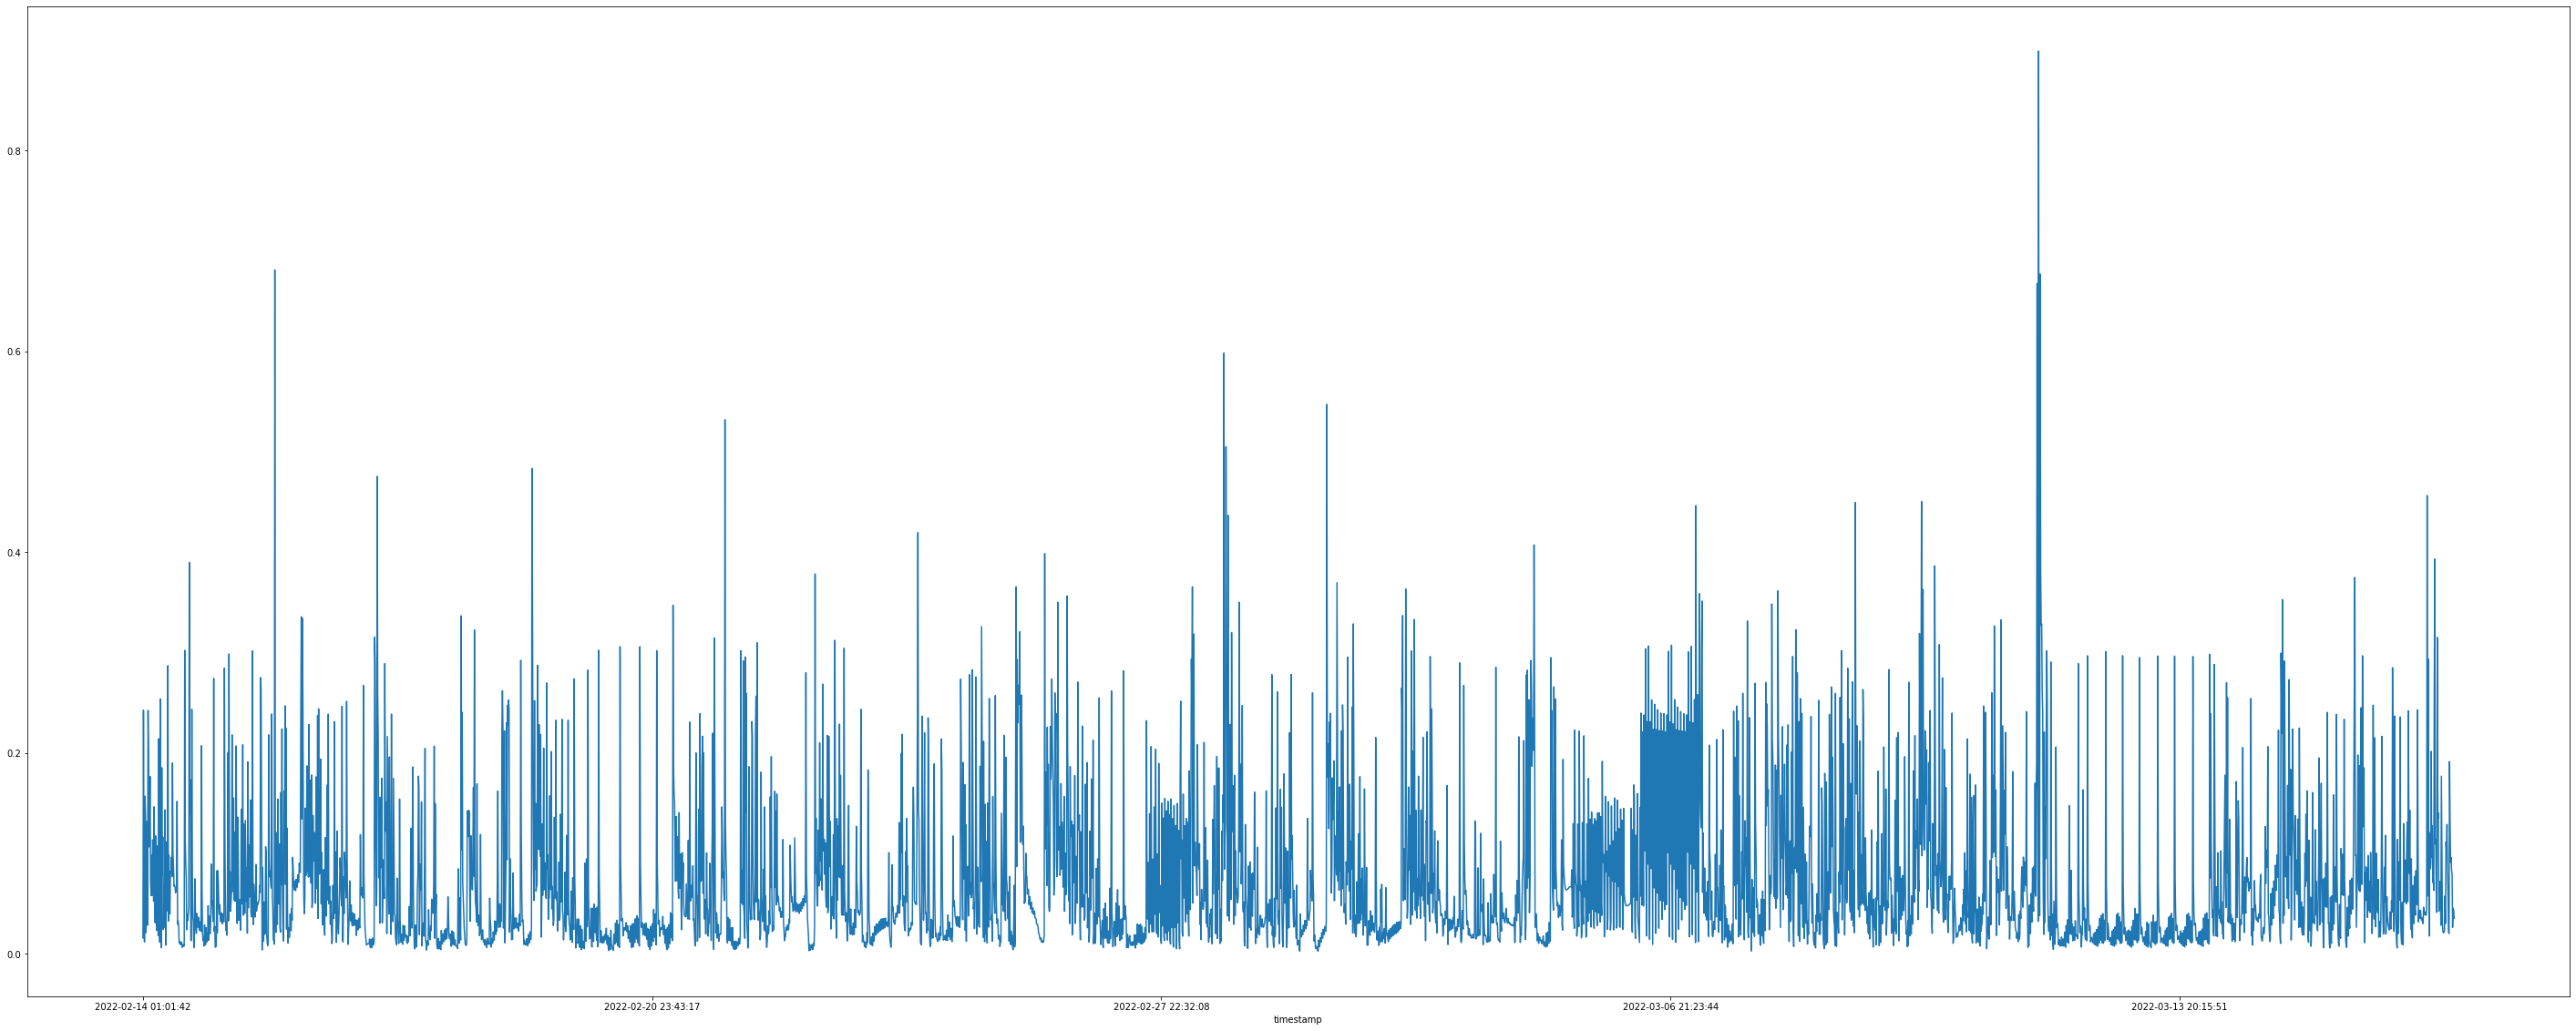

In [ ]:
X_test_scaled222['RMSE_test'].plot(figsize=(50,20))

In [ ]:
X_test_scaled222[X_test_scaled222['RMSE_test']>0.40]

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,RMSE_test
timestamp,,,,,,
2022-02-15 20:12:07,0.468661,0.220694,0.523651,0.734694,1.5,0.681234
2022-02-17 05:42:26,0.814815,1.024216,0.141668,-0.020408,0.0,0.475499
2022-02-19 08:22:57,0.807692,0.682218,0.412156,0.326531,1.0,0.483418
2022-02-21 23:40:49,0.344729,0.742415,0.007277,0.040816,0.0,0.531939
2022-02-24 14:51:25,0.484330,0.655961,0.184479,0.224490,0.0,0.419534
2022-02-28 19:12:26,0.682336,0.946605,0.102337,-0.020408,0.0,0.598266
2022-02-28 19:52:26,0.686610,1.028672,0.039404,-0.102041,0.0,0.505100
2022-02-28 20:32:27,0.824786,1.002446,0.166909,0.000000,0.0,0.436862
2022-03-02 04:52:45,0.923077,1.103632,0.160905,-0.040816,0.0,0.547289


In [ ]:
X_test_scaled222['RMSE_test_pct_change'] = np.abs(X_test_scaled222['RMSE_test'].pct_change().values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


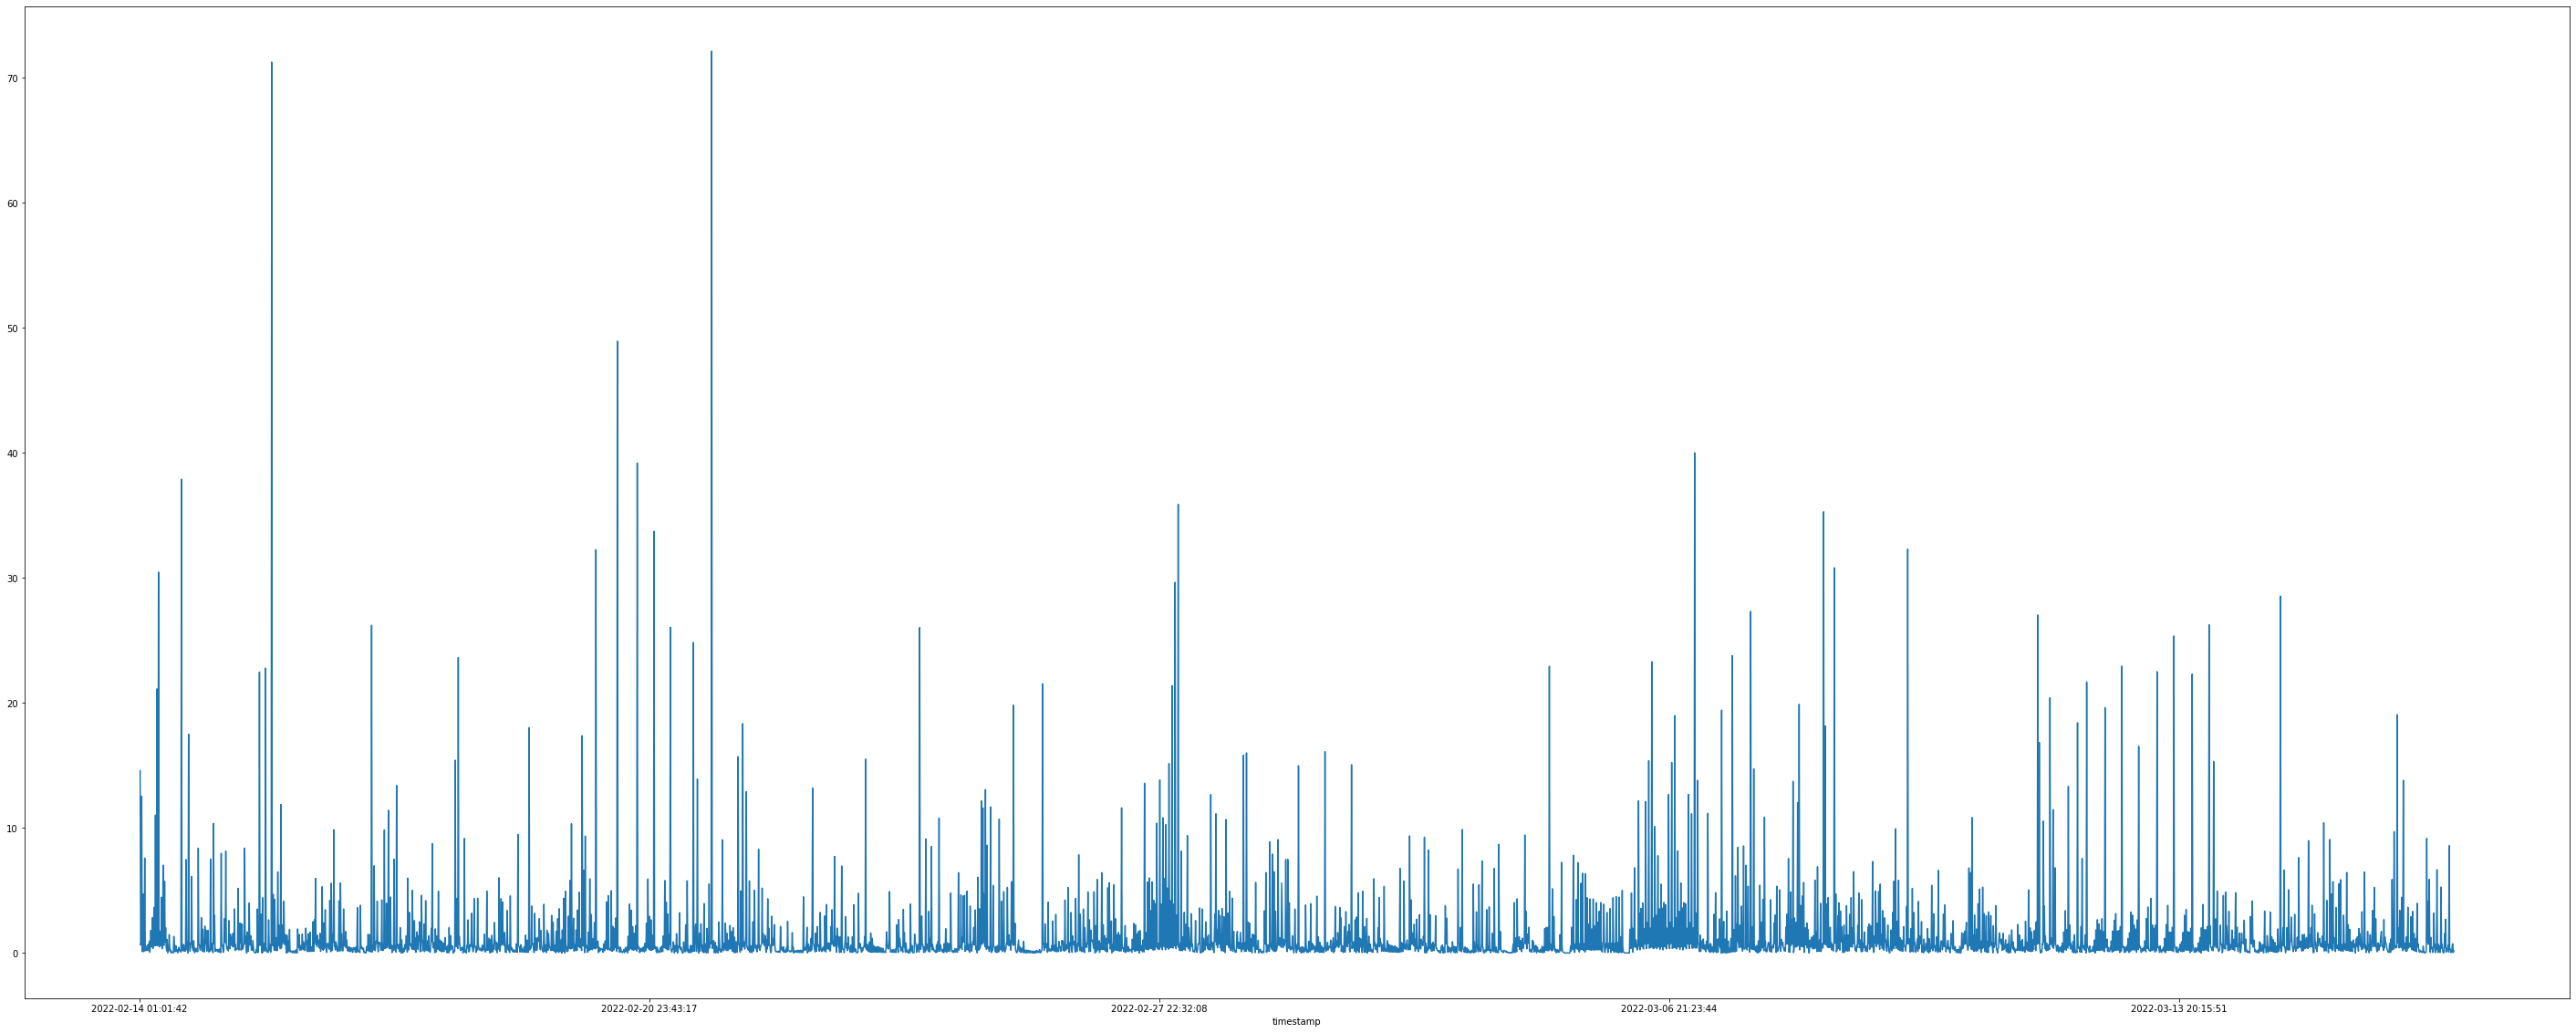

In [ ]:
X_test_scaled222['RMSE_test_pct_change'].plot(figsize=(50,20))

In [ ]:
df3[df3['incidencia']==1]['timestamp']

1053    2022-02-21 06:40:39
2071    2022-02-28 08:32:20
3068    2022-03-07 06:54:24
Name: timestamp, dtype: object

In [ ]:
X_test_scaled222[X_test_scaled222['RMSE_test_pct_change']>30]

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,RMSE_test,RMSE_test_pct_change
timestamp,,,,,,,
2022-02-14 07:11:46,0.490028,-0.001081,0.719054,1.000000,0.0,0.185227,30.452627
2022-02-14 14:41:48,0.497151,-0.003015,0.726096,1.000000,0.0,0.302178,37.883938
2022-02-15 20:12:07,0.468661,0.220694,0.523651,0.734694,1.5,0.681234,71.234480
2022-02-20 06:13:08,0.452991,0.140482,0.576318,0.836735,0.0,0.302319,32.253010
2022-02-20 13:13:12,0.430199,0.107240,0.585600,0.877551,0.0,0.305936,48.920839
2022-02-20 19:43:15,0.434473,0.117960,0.580239,0.857143,0.0,0.305859,39.186601
2022-02-21 01:13:18,0.434473,0.099258,0.595330,0.877551,0.0,0.301978,33.713715
2022-02-21 20:10:47,0.111111,0.064066,0.374863,0.897959,0.5,0.314573,72.110039
2022-02-28 04:42:13,0.474359,0.241132,0.511544,0.714286,0.0,0.173997,35.873668


In [ ]:
lstm_autoencoder.save('LPTIB502_GLE_TEDT_BW_DIIC_01.h5')

In [ ]:
model = keras.models.load_model('/content/LPTIB502_GLE_TEDT_BW_DIIC_01.h5')